In [185]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
plt.style.use('dark_background')

### Generate lists of di, tri, and tetranucleotides

In [92]:
nucl = ["A","T","G","C"]
di_nucl = {i+j:0 for i in nucl for j in nucl}
tri_nucl = {i+j:0 for i in di_nucl for j in nucl}
tetra_nucl = [i+j for i in tri_nucl for j in nucl]

In [93]:
def count_occurrences(subsequence, sequence):
    """
    Count occurrences of substring in a string
    (including overlaping substrings)
    
    Inputs:
    sequence - sequence
    subsequence - subsequence to be found in sequence
    
    Output: number of occurrences of subsequence in sequence
    """
    number_of_occurrences = 0
    for i in range(len(sequence)):
        if sequence[i:i+len(subsequence)] == subsequence:
            number_of_occurrences += 1
            
    return number_of_occurrences


def exp_tnf(tetra_nucl, tri_nucl, di_nucl):
    """Docstring goes here"""
    expected_tnf = np.zeros(len(tetra_nucl))
    for i in range(len(tetra_nucl)):
        tn = tetra_nucl[i]
        expected_tnf[i] = (tri_nucl[tn[0:3]]*tri_nucl[tn[1:4]])/di_nucl[tn[1:3]]
        
    return expected_tnf


def app_variance(expected_tnf, tetra_nucl, tri_nucl, di_nucl):
    """Docstring goes here"""
    app_var = np.zeros(len(tetra_nucl))
    for i in range(len(tetra_nucl)):
        tn = tetra_nucl[i]
        n23 = di_nucl[tn[1:3]]
        n123 = tri_nucl[tn[0:3]]
        n234 = tri_nucl[tn[1:4]]
        app_var[i] = expected_tnf[i] * (((n23-n123)*(n23-n234))/(n23*n23))
        
    return app_var


def tnf_z_score(tetra_freq, expected_tnf, app_var):
    """Docstring goes here"""
    z_scores = (tetra_freq-expected_tnf)/np.sqrt(app_var)
    return z_scores

### Tetranucleotide Z-score

In [94]:
contigs = SeqIO.parse("./test/test.fasta", 'fasta')

all_z_scores = []
for record in contigs:
    
    for di in di_nucl:
        di_nucl[di] = count_occurrences(di,record.seq)
        
    for tri in tri_nucl:
        tri_nucl[tri] = count_occurrences(tri,record.seq)

    tetra_freq = np.zeros(len(tetra_nucl))
    for i in range(len(tetra_nucl)):
        tetra_freq[i] = count_occurrences(tetra_nucl[i],record.seq)
        
    expected_tnf = exp_tnf(tetra_nucl, tri_nucl, di_nucl)
    app_var = app_variance(expected_tnf, tetra_nucl, tri_nucl, di_nucl)
    z_scores = tnf_z_score(tetra_freq, expected_tnf, app_var)
    
    all_z_scores.append(z_scores)

In [190]:
all_z_scores = np.array(all_z_scores)
median_z = np.median(all_z_scores, axis=0)

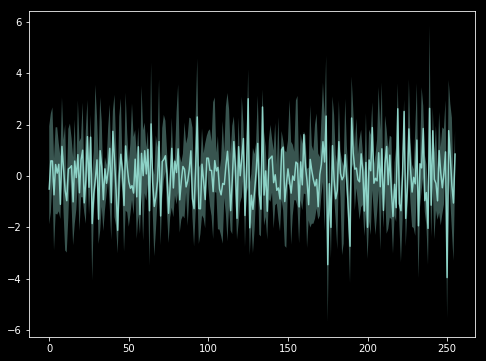

In [189]:
#plt.plot(np.amax(all_z_scores, axis=0), alpha=0.4)
#plt.plot(np.amin(all_z_scores, axis=0), alpha=0.4)
plt.fill_between(range(256), np.amax(all_z_scores, axis=0), np.amin(all_z_scores, axis=0),
                 alpha=0.4)
plt.plot(median_z)
plt.show()

### Correlation coefficient

In [211]:
np.corrcoef(all_z_scores[3], median_z)

array([[1.        , 0.76100977],
       [0.76100977, 1.        ]])